# Data Analaysis of Udemy Courses.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('udemy_courses.csv')
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [5]:
df.shape

(3678, 12)

In [7]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [8]:
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

# Courses vs Subjects

In [9]:
C_count = df.subject.value_counts()
C_count

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

<Axes: title={'center': 'Courses Vs Subjects'}, xlabel='Subjects', ylabel='No. of courses'>

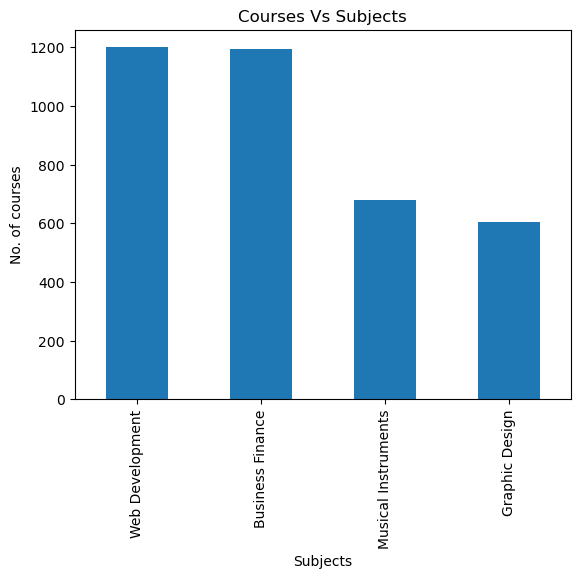

In [11]:
C_count.plot(kind='bar', title='Courses Vs Subjects', xlabel='Subjects', ylabel='No. of courses')

Clearly, Web Dev. and Business Finance are the most popular subjects on Udemy.

# No. of free courses

In [22]:
df1 = df[df.is_paid==False]
df1.shape

(310, 12)

# Least selling courses : Top 7

In [24]:
df.sort_values(by='num_subscribers', ascending=True).head(7)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
885,1032648,beginning accounting,https://www.udemy.com/beginning_accounting/,True,20,0,0,12,Intermediate Level,0.633333,2016-12-26T16:52:47Z,Business Finance
456,1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2.000000,2017-07-03T21:40:32Z,Business Finance
457,1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50,0,0,9,Intermediate Level,2.000000,2017-06-29T22:01:56Z,Business Finance
458,1258666,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,True,50,0,0,9,Intermediate Level,2.000000,2017-06-29T23:20:10Z,Business Finance
459,1168172,Case studies on credit appraisal for bankers,https://www.udemy.com/case-studies-on-credit-a...,True,20,0,0,15,Beginner Level,3.500000,2017-05-01T20:16:26Z,Business Finance
460,1233314,Building a Balanced Scorecard,https://www.udemy.com/building-balanced-scorec...,True,50,0,0,11,Intermediate Level,2.000000,2017-07-03T21:38:22Z,Business Finance
461,1276182,Options Trading Foundation: Your journey to co...,https://www.udemy.com/option-trading-foundatio...,True,95,0,0,5,Intermediate Level,1.000000,2017-07-05T04:41:54Z,Business Finance


# Max. no. of Subscribers : By Level of Course

In [30]:
sub_vs_level = df.groupby('level')['num_subscribers'].sum()
sub_vs_level

level
All Levels            6915076
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

<Axes: ylabel='num_subscribers'>

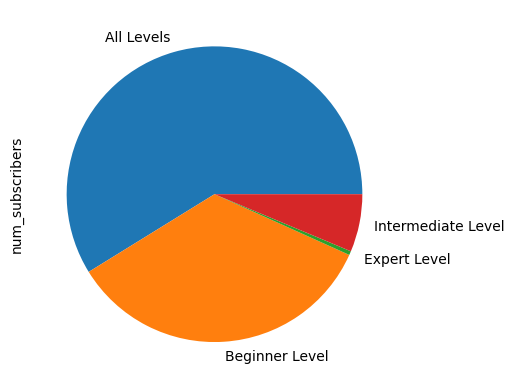

In [36]:
sub_vs_level.plot(kind='pie')

In [32]:
max_sub_each_level = df.groupby('level')['num_subscribers'].max()
max_sub_each_level

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

<Axes: xlabel='level'>

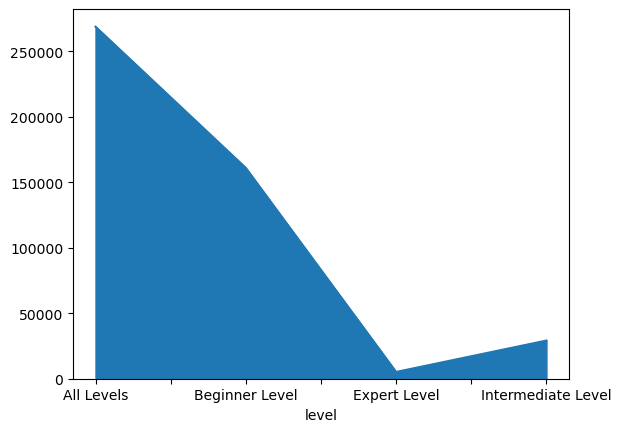

In [35]:
max_sub_each_level.plot.area()

# Thanks